# Линейная регрессия

Задача: линейная регрессия 
Ответ: линейная функция от данных

$$y = w_1 x_1 + \ldots + w_m x_m = \langle x, w\rangle,$$

* Здесь $\langle\cdot, \cdot\rangle$ — скалярное произведение.
* $w_i$ — вес i-ого признака в модели линейной регрессии. 
    * $w=(w_1, \ldots, w_m)$ — вектор весов признаков.
* $x_i$ — значение i-ого признака во входном $x$ 

Один из способов решения задачи поиска оптимальных весов: метод наименьших квадратов.

При использовании этого метода минимизируется *квадратичная функция потерь*:

$$Q(w) = \sum_{j=1}^n Q_j(w) = \sum_{j=1}^n ( \langle x^j, w\rangle - y^j)^2$$

Здесь $n$ — число элементов в обучающей выборке.

Явная формула для вектора весов (решает задачу минимизации):

$$w = (X^T X)^{-1} X^T y,$$

где $X$ — матрица объект-признак (по строкам объекты, по столбцам признаки), $y$ — вектор правильных ответов.

Ограничения формулы:

1. Используется «дорогая» операция — обращение матрицы размером $d\times d$, где $d$ — количество признаков. Она занимает $O(d^3)$ операций, и если $d$ большое, может быть довольно медленной.

2. Работает исходя из минимизации квадратичной функции потерь. Если мы захотим использовать другую формулу потерь, она не работает.

Вместо использования явной формулы можно предложить другой подход — минимизация $Q$ с помощью итеративных методов.

Простейшим из них является метод градиентного спуска. 

## Градиентный спуск (gradient descent)

Рассмотрим функцию $f(x, y)=x^2 + 10 y^2$. Её градиент равен $\nabla f(x, y)=\frac{\partial f(x, y)}{\partial(x, y)}=(2x, 20y)$.

[Тут](https://www.matematicus.ru/vysshaya-matematika/proizvodnaya/gradient-funktsii-neskolkih-peremennyh) повторение, как найти градиент функции многих переменных.

[Тут](http://mathprofi.ru/chastnye_proizvodnye_primery.html) повторение поиска производной функции первого порядка


Градиент показывает направление наискорейшего роста функции, то есть отвечает на вопрос «куда нам идти, если мы находимся в точке $(x, y)$ и хотим увеличивать значение функции как можно быстрее».

Чтобы уменьшать значение функции, нужно идти в противоположном направлении. В связи с этим, напрашивается такой алгоритм нахождения минимума функции $f$:

1. Возьмём любую точку $(x_0, y_0)$. Посчитаем градиент в этой точке.

2. Для каждого $i=1, \ldots$, положим: $(x_{i+1}, y_{i+1})=(x_i, y_i) - \eta \nabla f(x_i, y_i)$, где $\eta$ — какое-то число (небольшое).

3. Будем продолжать вычислять очередную точку $(x_i, y_i)$ до тех пор, пока мы не окажемся достаточно близко к минимуму — например, до тех пор, пока градиент не слишком маленький.

In [1]:
import numpy as np
from scipy.linalg import norm

In [2]:
def f(x, y):
    return np.array(x**2 + 10*y**2)

def d_f(x, y):
    return np.array([2*x, 20*y])

In [4]:
eta = 0.01
steps = 20000
x, y = -3, 3 # starting points

In [62]:
eta = 0.01
x, y = -3, 3
u_prev = np.array([x, y]) # положим точки в массив для векторизации операций

points = [] # общий путь
for _ in range(steps):
    
    points.append(u_prev)
    
    u_new = u_prev - eta * d_f(*u_prev) # вычисление новых точек
    
    u_prev = u_new

In [63]:
points[-1]

array([-1.01720627e-175,  9.88131292e-324])

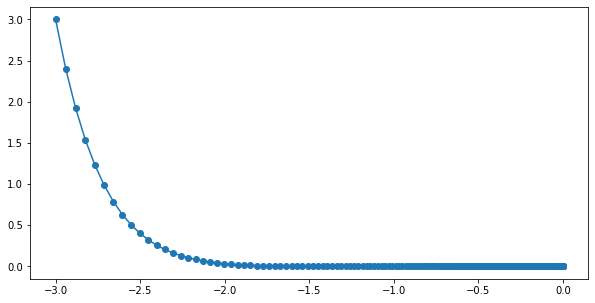

In [64]:
plt.figure(figsize=(10,5))
plt.plot([p[0] for p in points], [p[1] for p in points], 'o-');

In [65]:
# Досрочная остановка

eta = 0.01
x, y = -3, 3
u_prev = np.array([x, y]) # положим точки в массив для векторизации операций

points = [] # общий путь
for _ in range(steps):
    
    points.append(u_prev)
    
    u_new = u_prev - eta * d_f(*u_prev) # вычисление новых точек
    
    if norm(u_new - u_prev) < 1e-10: # проверка на близость старых точек к новым
            break
    
    u_prev = u_new

print(len(points))

1002


In [68]:
# Слишком высокий темп обучения - не сходится

eta = 1
x, y = -3, 3
u_prev = np.array([x, y]) # положим точки в массив для векторизации операций

points = [] # общий путь
for _ in range(steps):
    
    points.append(u_prev)
    
    u_new = u_prev - eta * d_f(*u_prev) # вычисление новых точек
    
    u_prev = u_new

/tmp/ipykernel_243268/2619242260.py:5: RuntimeWarning: overflow encountered in long_scalars
  return np.array([2*x, 20*y])


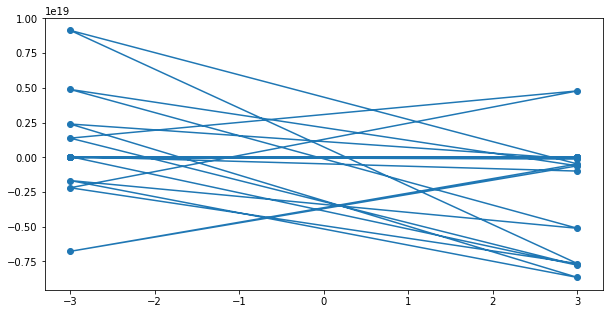

In [69]:
plt.figure(figsize=(10,5))
plt.plot([p[0] for p in points[:30]], [p[1] for p in points[:30]], 'o-');

In [76]:
# Слишком низкий темп обучения - не сходится

eta = 0.0000000001
x, y = -3, 3
u_prev = np.array([x, y]) # положим точки в массив для векторизации операций

points = [] # общий путь
for _ in range(steps):
    
    points.append(u_prev)
    
    u_new = u_prev - eta * d_f(*u_prev) # вычисление новых точек
    
    u_prev = u_new

print(len(points))
print(points[-1])

20000
[-2.999988    2.99988001]


## Градиентный спуск для линейной регрессии

$w_j = w_j - \eta\frac{\partial }{\partial w_j}L(f_w,X,y)$.

Рассмотрим градиентный спуск для функции потерь

$MSE = \frac {1}{n} \sum_{i=1}^n (y_i - pred_i)^2$ где $pred_i = <x, w>$

$MSE  -> min_w$

[Вывод градиента MSE](https://www.coursera.org/lecture/machine-learning-foundations/vyvod-ghradiienta-dlia-mse-H5Rw9)

$\nabla _w MSE = \frac {1}{n} \sum_{i=1}^n 2x_i (<x_i, w_j> - y_i)$


In [ ]:
# Псевдокод обучения линейной регрессии методом градиентного спуска

w = random()         
for e in range(epochs):
    y_pred = X.dot(w)
    err = MSE(y, y_pred)
    grad = 2 * X.T.dot(err) / n
    w -= eta * grad 

## Стохастический градиентный спуск

Основная идея: оценка градиентна по подвыборке

$L(w, X, y) = \frac{1}{n} \sum_{i=1}^n L(W, x_i, y_i)$

$\nabla _w L(w, X, y) = \frac {1}{B} \sum_{i=1}^B \nabla _w L(w, X_i, y_i) $

In [ ]:
w = random()         
for e in range(epochs):
    for x_batch, y_batch in batches:
        y_pred = x_batch.dot(w)
        err = MSE(y_batch, y_pred)
        grad = 2 * x_batch.T.dot(err) / n
        w -= eta * grad

![grad](https://ml-handbook.ru/chapters/linear_models/images/sgd_vs_gd.png)

![Gradient descent](https://miro.medium.com/max/1400/1*KoskxJ848dZqSnp40H95iA.png)

![sgd](https://miro.medium.com/max/1400/1*GbVZ-4a9NfQxm-kfk4Y8Ww.png)

![sgd](https://miro.medium.com/max/1400/1*qKbbN_iT2JWmg7_MLU6AwA.png)